In [2]:
import pandas as pd

In [3]:
ameshousingdf = pd.read_csv("../data/AmesHousing.csv")

PRIMARY DATA EXPLORATION

In [4]:
ameshousingdf.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,943,911103050,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
1,724,902405100,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,...,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900
2,170,902102100,50,RM,60.0,4800,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,COD,Abnorml,80400
3,2689,903430090,50,RM,59.0,5310,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,117000
4,738,903228070,50,RM,60.0,6000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,93000


In [5]:
ameshousingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
ameshousingdf.isnull().sum().sort_values(ascending=False).loc[lambda x:x > 0]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
Electrical           1
dtype: int64

DATA CLEANING

In [7]:
cols_to_drop = ["Pool QC", "Misc Feature", "Alley", "Fence"]
ameshousingdf = ameshousingdf.drop(columns=cols_to_drop)

In [8]:
# Mas Vnr Type - missing means none
ameshousingdf["Mas Vnr Type"] = ameshousingdf["Mas Vnr Type"].fillna("None")

In [9]:
# Mas Vnr Area - missing means zero area
ameshousingdf["Mas Vnr Area"] = ameshousingdf["Mas Vnr Area"].fillna(0)

In [10]:
# Fireplace Qu
ameshousingdf["Fireplace Qu"] = ameshousingdf["Fireplace Qu"].fillna("No Fireplace")

In [11]:
# Lot Frontage - fill with median
ameshousingdf["Lot Frontage"] = ameshousingdf["Lot Frontage"].fillna(ameshousingdf["Lot Frontage"].median())

In [12]:
# Garage features - missing means no garage
garage_cols = ["Garage Qual", "Garage Yr Blt", "Garage Cond", "Garage Finish", "Garage Type"]
for col in garage_cols:
    if ameshousingdf[col].dtype == "O":
        ameshousingdf[col] = ameshousingdf[col].fillna("No Garage")
    else:
        ameshousingdf[col] = ameshousingdf[col].fillna(0)

In [13]:
# Basement features - missing means no basement
basement_cols = ["Bsmt Exposure", "BsmtFin Type 1", "BsmtFin Type 2", "Bsmt Qual", "Bsmt Cond"]
for col in basement_cols:
    ameshousingdf[col] = ameshousingdf[col].fillna("No Basement")

# Other small numeric missing
ameshousingdf["Bsmt Full Bath"] = ameshousingdf["Bsmt Full Bath"].fillna(0)
ameshousingdf["Bsmt Half Bath"] = ameshousingdf["Bsmt Half Bath"].fillna(0)
ameshousingdf["Total Bsmt SF"] = ameshousingdf["Total Bsmt SF"].fillna(0)
ameshousingdf["BsmtFin SF 1"] = ameshousingdf["BsmtFin SF 1"].fillna(0)
ameshousingdf["BsmtFin SF 2"] = ameshousingdf["BsmtFin SF 2"].fillna(0)
ameshousingdf["Bsmt Unf SF"] = ameshousingdf["Bsmt Unf SF"].fillna(0)
ameshousingdf["Garage Area"] = ameshousingdf["Garage Area"].fillna(0)
ameshousingdf["Garage Cars"] = ameshousingdf["Garage Cars"].fillna(0)

# Electrical - fill with mode
ameshousingdf["Electrical"] = ameshousingdf["Electrical"].fillna(ameshousingdf["Electrical"].mode()[0])

In [14]:
ameshousingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

EXPLORATORY DATA ANALYSIS

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's explore numeric columns

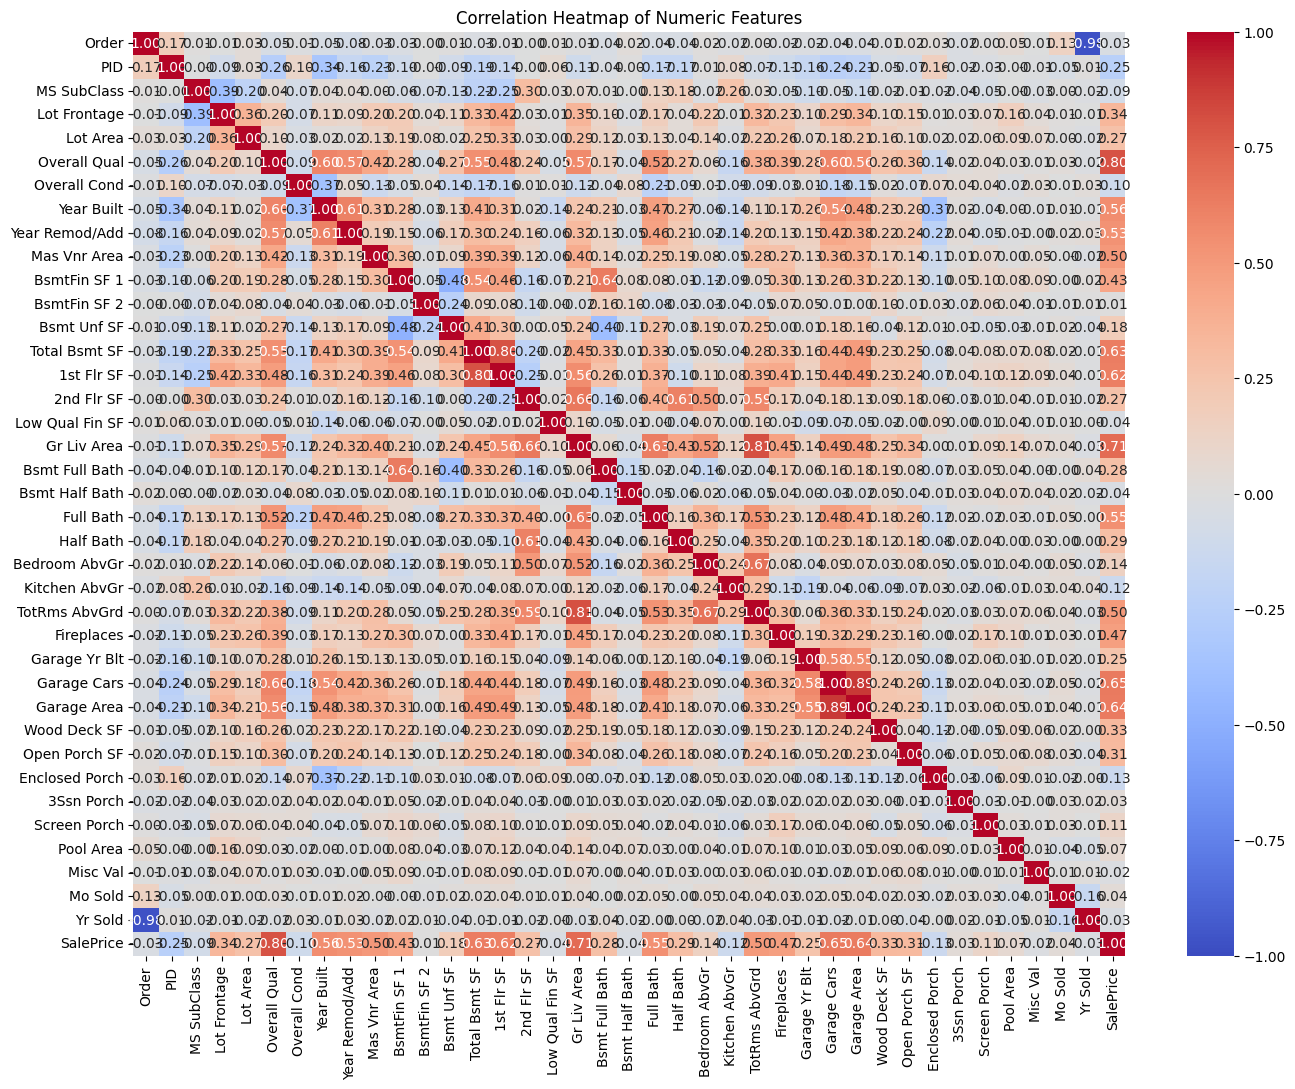

In [16]:
# Construct a heatmap to view relationship between numeric data and target values
numeric_cols = ameshousingdf.select_dtypes(include=["int64","float64"]).columns
# build correlation matrix
corr = ameshousingdf[numeric_cols].corr()

# plot heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap="coolwarm",annot=True,fmt=".2f",vmin=-1,vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [17]:
corr_with_target = corr["SalePrice"].sort_values(ascending=False)
print(corr_with_target)


SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647562
Garage Area        0.640138
Total Bsmt SF      0.632529
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Mas Vnr Area       0.502196
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.433147
Lot Frontage       0.340256
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.275823
2nd Flr SF         0.269373
Lot Area           0.266549
Garage Yr Blt      0.253459
Bsmt Unf SF        0.183308
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.006018
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035817
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

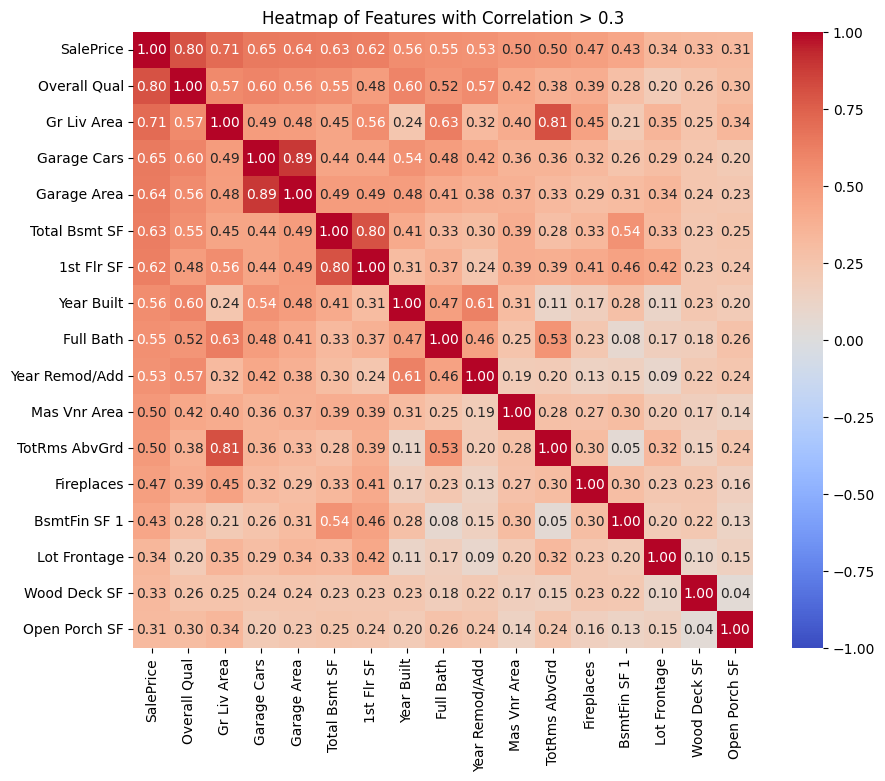

In [18]:
# keep only features with absolute correlation > 0.3 with SalePrice
corr_above_thresh = corr_with_target[abs(corr_with_target) > 0.3].index

# build a heatmap only on those features
plt.figure(figsize=(10,8))
sns.heatmap(
    ameshousingdf[corr_above_thresh].corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    vmin=-1, vmax=1
)
plt.title("Heatmap of Features with Correlation > 0.3")
plt.show()


Now for categorical variables

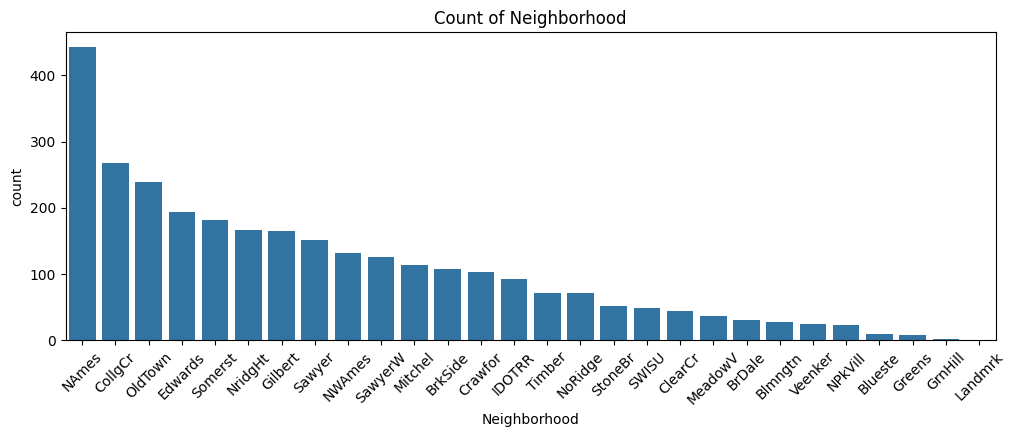

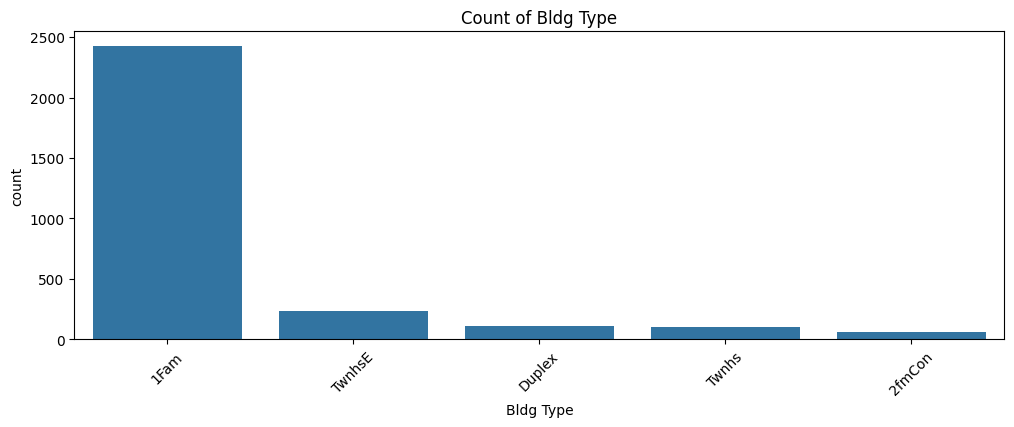

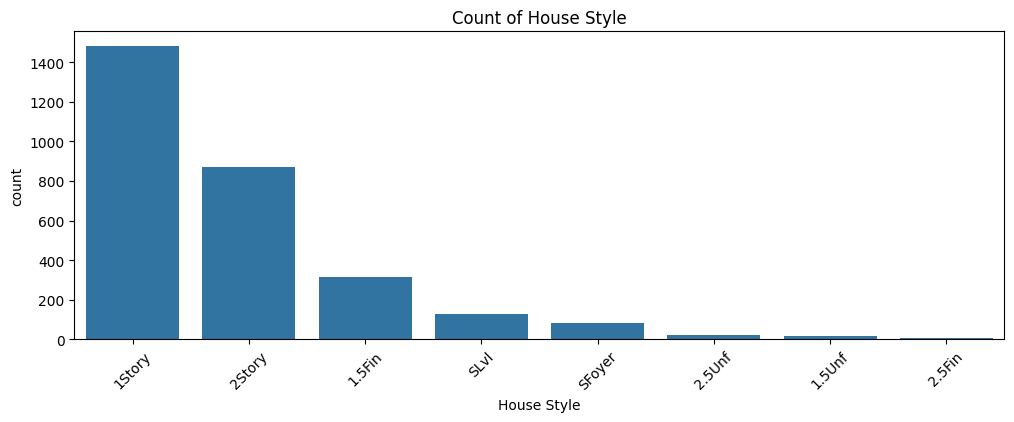

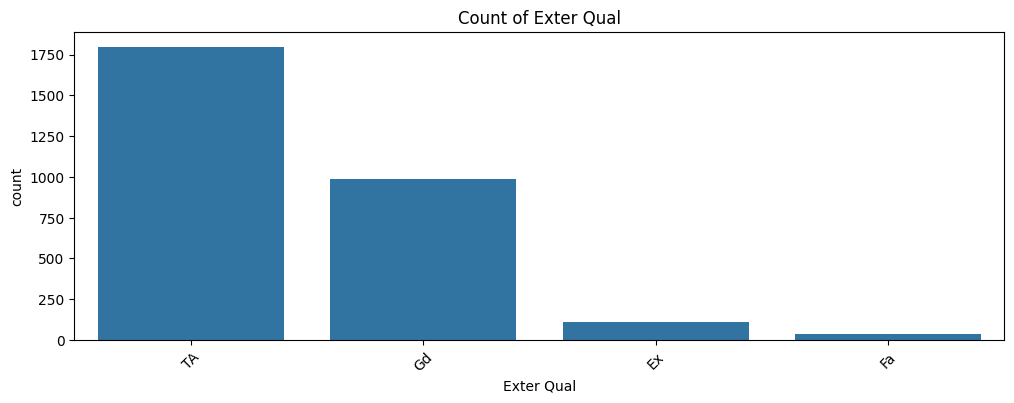

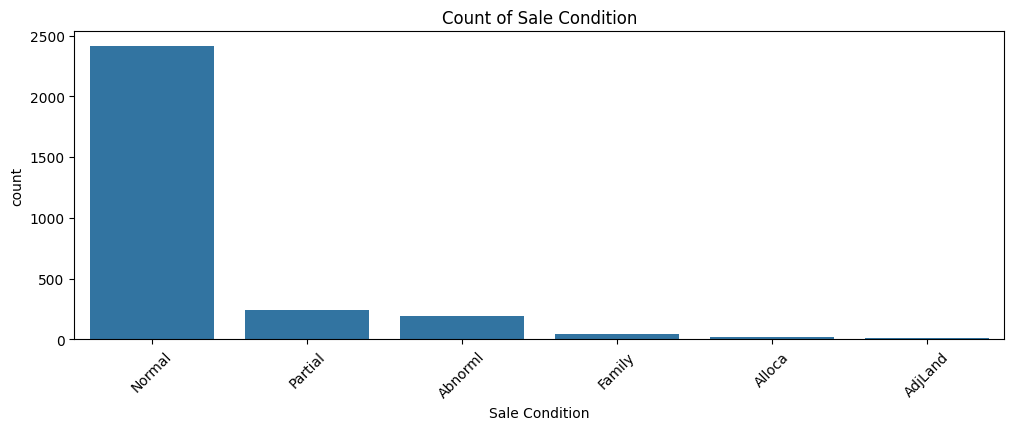

In [19]:
for cat in ["Neighborhood", "Bldg Type", "House Style", "Exter Qual", "Sale Condition"]:
    plt.figure(figsize=(12,4))
    sns.countplot(x=cat, data=ameshousingdf, order=ameshousingdf[cat].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {cat}")
    plt.show()


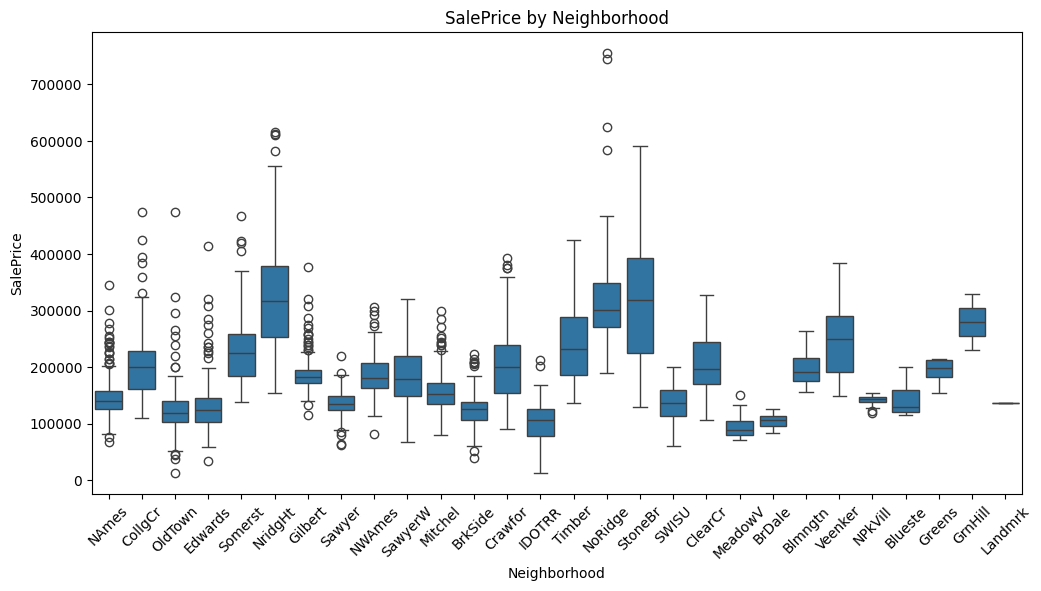

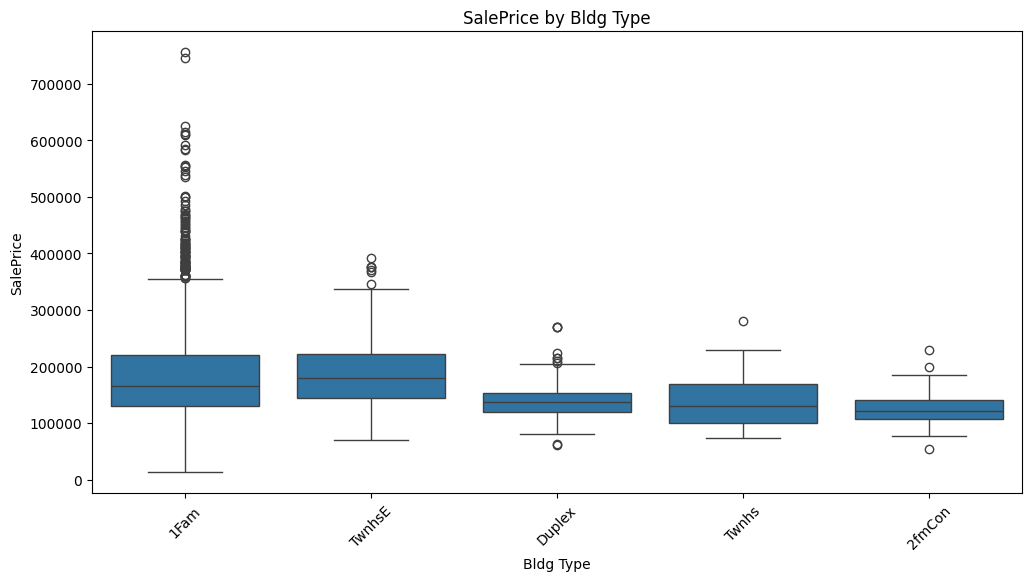

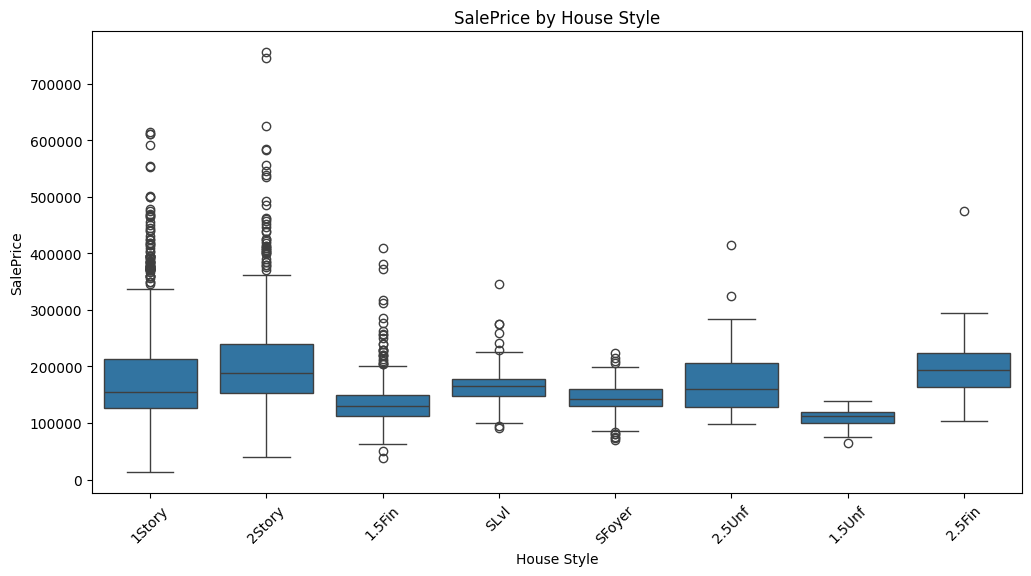

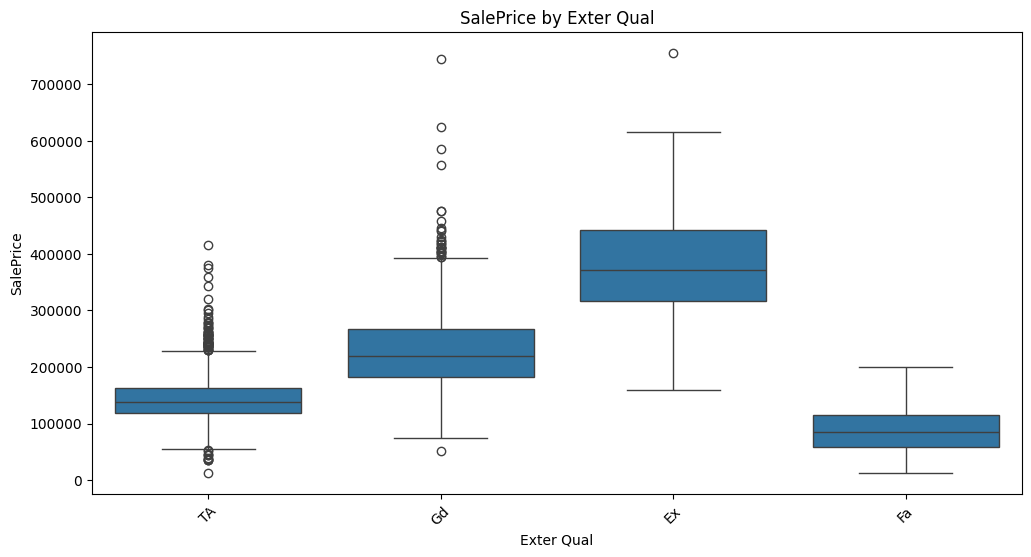

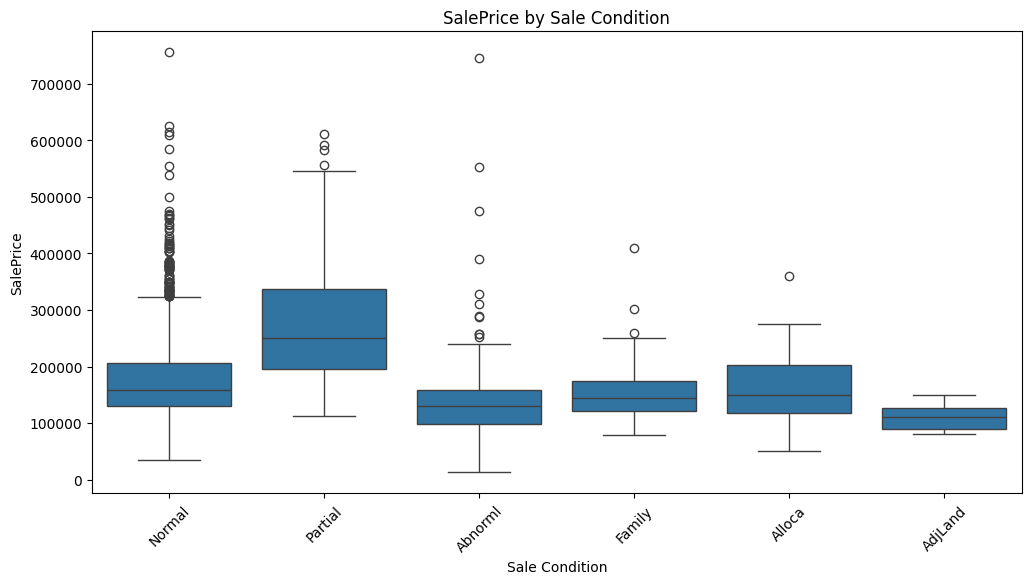

In [20]:
for cat in ["Neighborhood", "Bldg Type", "House Style", "Exter Qual", "Sale Condition"]:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=cat,y="SalePrice",data=ameshousingdf,order=ameshousingdf[cat].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"SalePrice by {cat}")
    plt.show()

FEATURE SELECTION

In [21]:
numeric_features = [
    "Overall Qual", 
    "Gr Liv Area",
    "Garage Cars", 
    "Garage Area", 
    "Total Bsmt SF", 
    "1st Flr SF", 
    "Year Built", 
    "Full Bath", 
    "Year Remod/Add", 
    "Mas Vnr Area", 
    "TotRms AbvGrd", 
    "Fireplaces", 
    "BsmtFin SF 1", 
    "Lot Frontage", 
    "Wood Deck SF", 
    "Open Porch SF"
]


In [22]:
categorical_features = [
    "Neighborhood", 
    "Bldg Type", 
    "House Style", 
    "Exter Qual", 
    "Exter Cond", 
    "Sale Type", 
    "Sale Condition"
]


In [23]:
target = "SalePrice"

In [24]:
dummies = pd.get_dummies(
    ameshousingdf[categorical_features],
    prefix=categorical_features,
    drop_first=True
)

In [25]:
X = pd.concat(
    [ameshousingdf[numeric_features], dummies],
    axis=1
)
X = X.astype(int)

In [26]:
y = ameshousingdf["SalePrice"]

In [27]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2930, 75)
y shape: (2930,)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R2: {r2:.2f}")

Random Forest RMSE: 37612.90
Random Forest R2: 0.79


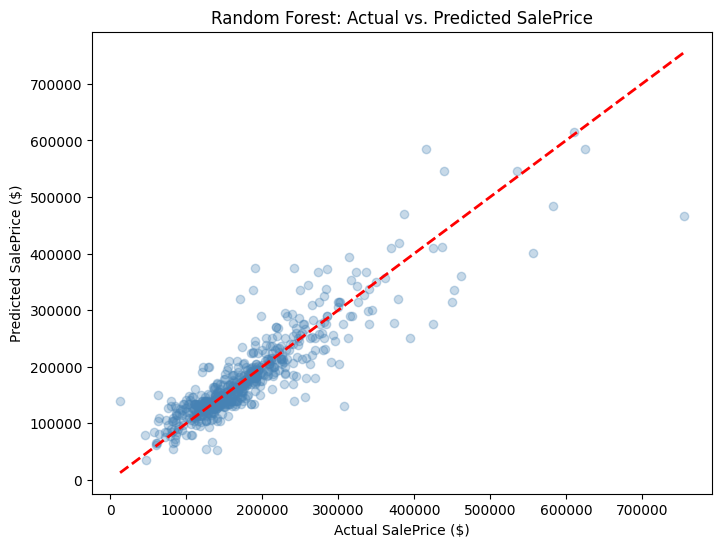

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3, color="steelblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual SalePrice ($)")
plt.ylabel("Predicted SalePrice ($)")
plt.title("Random Forest: Actual vs. Predicted SalePrice")
plt.show()


In [32]:
import pandas as pd

# get importances
importances = rf.feature_importances_

# match to feature names
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# show top 20
print(feature_importance_df.head(20))


                  feature  importance
1             Gr Liv Area    0.068850
4           Total Bsmt SF    0.065328
5              1st Flr SF    0.064300
3             Garage Area    0.062481
6              Year Built    0.060056
13           Lot Frontage    0.059490
12           BsmtFin SF 1    0.056180
8          Year Remod/Add    0.054527
15          Open Porch SF    0.044337
14           Wood Deck SF    0.044084
10          TotRms AbvGrd    0.039913
9            Mas Vnr Area    0.038544
0            Overall Qual    0.034439
11             Fireplaces    0.023014
2             Garage Cars    0.020624
7               Full Bath    0.017020
73  Sale Condition_Normal    0.011512
48     House Style_1Story    0.011445
51     House Style_2Story    0.010949
60          Exter Cond_TA    0.010343


In [33]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [35]:
print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 26455.303795021


In [36]:
best_rf = grid_search.best_estimator_

y_pred_tuned = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred_tuned)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_tuned)

print(f"Tuned RF RMSE: {rmse:.2f}")
print(f"Tuned RF R2: {r2:.2f}")


Tuned RF RMSE: 27902.01
Tuned RF R2: 0.89


In [37]:
import numpy as np

y_log = np.log1p(y)   # log1p handles log(0) safely


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [39]:
best_rf.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=200,
                      n_jobs=-1, random_state=42)

In [40]:
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)   # convert log-predictions back to original scale
y_test = np.expm1(y_test_log)   # convert true test values back too

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Tuned RF with Log Target RMSE: {rmse:.2f}")
print(f"Tuned RF with Log Target R2: {r2:.2f}")

Tuned RF with Log Target RMSE: 29679.40
Tuned RF with Log Target R2: 0.87


FEATURE ENGINEERING FOR MODEL IMPROVEMENT

In [42]:
ameshousingdf["HouseAge"] = ameshousingdf["Yr Sold"] - ameshousingdf["Year Built"]
ameshousingdf["RemodAge"] = ameshousingdf["Yr Sold"] - ameshousingdf["Year Remod/Add"]

In [43]:
ameshousingdf["TotalBaths"] = (
    ameshousingdf["Full Bath"]
    + 0.5 * ameshousingdf["Half Bath"]
    + ameshousingdf["Bsmt Full Bath"]
    + 0.5 * ameshousingdf["Bsmt Half Bath"]
)


In [ ]:
ameshousingdf["TotalSF"] = (
    ameshousingdf["Gr Liv Area"] + ameshousingdf["Total Bsmt SF"] + ameshousingdf["Garage Area"]
)

In [45]:
ameshousingdf["Qual_x_LivArea"] = ameshousingdf["Overall Qual"] * ameshousingdf["Gr Liv Area"]

In [46]:
new_numeric_features = numeric_features + [
    "HouseAge",
    "RemodAge",
    "TotalBaths",
    "TotalSF",
    "Qual_x_LivArea"
]


In [47]:
X = pd.concat(
    [ameshousingdf[new_numeric_features], dummies],
    axis=1
)
X = X.astype(int)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=200,
                      n_jobs=-1, random_state=42)

In [50]:
y_pred = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Random Forest with new features RMSE: {rmse:.2f}")
print(f"Random Forest with new features R2: {r2:.2f}")

Random Forest with new features RMSE: 26185.52
Random Forest with new features R2: 0.90


LET US TRY XGBOOST

In [51]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [52]:
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_xgb)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R2: {r2:.2f}")


XGBoost RMSE: 23344.43
XGBoost R2: 0.92


In [ ]:
import joblib
joblib.dump(xgb, "xgb_ames_model.pkl")

['xgb_ames_model.pkl']